In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("drug200(DT).csv")

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [ ]:
df.shape

(200, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<Axes: xlabel='Drug', ylabel='Count'>

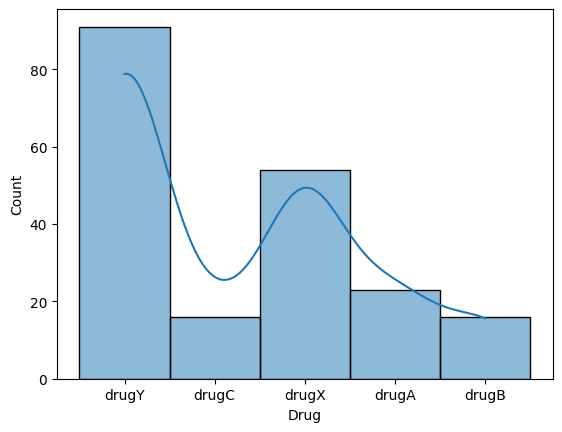

In [ ]:
sns.histplot(df['Drug'],kde=True)

<Axes: >

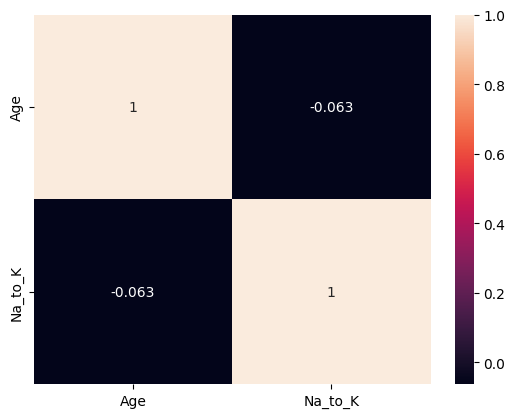

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='Drug', ylabel='Age'>

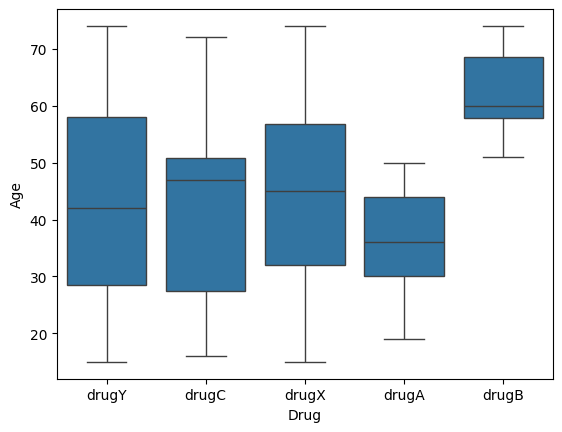

In [ ]:
sns.boxplot(data=df, x='Drug',y='Age')

In [ ]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

<Axes: xlabel='Drug', ylabel='Cholesterol'>

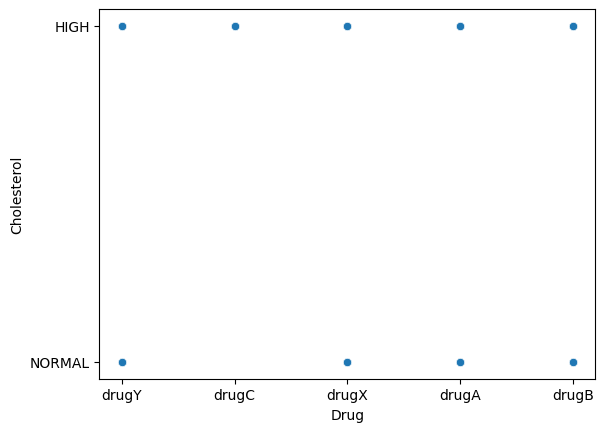

In [ ]:
sns.scatterplot(data=df, x='Drug',y='Cholesterol')

<Axes: xlabel='Drug', ylabel='Na_to_K'>

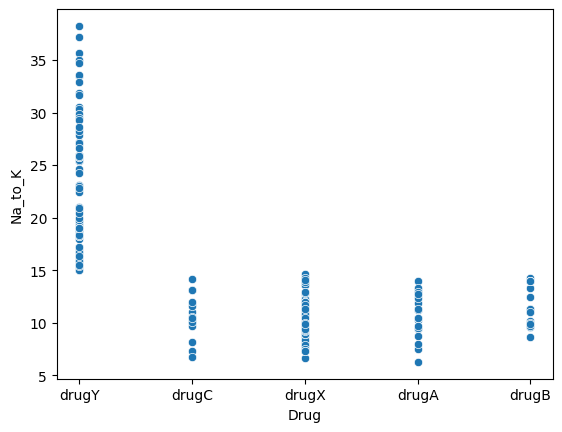

In [ ]:
sns.scatterplot(data=df, x='Drug',y='Na_to_K')


In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
columns = ['Sex','BP','Cholesterol','Drug']
for i in columns:
  le = LabelEncoder()
  df[i]=le.fit_transform(df[i])


In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [ ]:
X=df.drop(columns='Drug',axis=1)
y=df['Drug']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([3, 4, 3, 3, 4, 4, 4, 3, 0, 3, 4, 3, 4, 4, 1, 4, 1, 3, 3, 4, 1, 3,
       3, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 0, 4, 3, 4, 4, 4, 3, 3, 3, 4])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,recall_score

In [ ]:
score = accuracy_score(y_test,y_pred)

In [ ]:
score

0.7954545454545454

In [ ]:
matrix = confusion_matrix(y_test,y_pred)

In [ ]:
matrix

array([[ 2,  0,  0,  0,  4],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  0,  4,  1],
       [ 0,  0,  0, 14,  0],
       [ 0,  0,  0,  0, 16]])

In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
f1

0.7292690417690418

In [ ]:
recall = recall_score(y_test, y_pred, average='weighted')

In [ ]:
recall

0.7954545454545454

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x_train_scaled = sc.fit_transform(X_train)
x_test_scaled = sc.fit_transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn= knn.predict(x_test_scaled)

In [ ]:
y_pred_knn

array([3, 4, 3, 2, 4, 1, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 4, 4, 1, 4, 3, 0, 4, 0, 3, 3, 3, 4])

In [ ]:
knn_score= accuracy_score(y_pred_knn,y_test)

In [ ]:
knn_score

0.9318181818181818

In [ ]:
recall_knn = recall_score(y_pred_knn,y_test,average='weighted')

In [ ]:
recall_knn

0.9318181818181818

In [ ]:
fe_knn = f1_score(y_pred_knn,y_test,average="weighted")

In [ ]:
fe_knn

0.9284320477502296

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
nb_score= accuracy_score(y_pred_nb,y_test)


In [ ]:
nb_score

0.9318181818181818

In [ ]:
recall_nb = recall_score(y_pred_nb,y_test,average='weighted')


In [ ]:
recall_nb

0.9318181818181818

In [ ]:
fe_nb = f1_score(y_pred_nb,y_test,average="weighted")


In [ ]:
fe_nb

0.9318142672374647

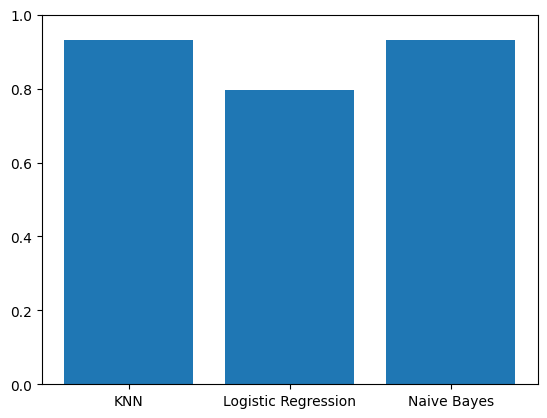

In [ ]:
import matplotlib.pyplot as plt

models = ['KNN', 'Logistic Regression', 'Naive Bayes']
accuracies = [knn_score , score , nb_score]

plt.bar(models, accuracies)
plt.ylim(0,1)
plt.show()


In [ ]:
import pickle

# Maan lo knn model trained hai: knn
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)


In [ ]:
import pickle

# Maan lo knn model trained hai: knn
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib

# अपना ओरिजिनल डेटा लोड करें
df = pd.read_csv('drug200(DT).csv')
features = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]

# स्केलर फिट करें और सेव करें
scaler = StandardScaler()
scaler.fit(features)
joblib.dump(scaler, 'scaler.pkl')

ValueError: could not convert string to float: 'F'

In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# 1. अपना डेटा लोड करें
df = pd.read_csv("drug200(DT).csv")

# 2. फीचर्स चुनें (जो मॉडल में हैं)
# ध्यान दें: शब्दों (F/M) को पहले नंबरों में बदलें
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['BP'] = df['BP'].map({'HIGH': 0, 'LOW': 1, 'NORMAL': 2})
df['Cholesterol'] = df['Cholesterol'].map({'HIGH': 0, 'NORMAL': 1})

X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]

# 3. स्केलर फिट करें और सेव करें
scaler = StandardScaler()
scaler.fit(X)
joblib.dump(scaler, "scaler.pkl")

print("आपका scaler.pkl तैयार है! अब इसे UI में इस्तेमाल करें।")

आपका scaler.pkl तैयार है! अब इसे UI में इस्तेमाल करें।
